## Задание 1

### 1.1. Скачать следующие данные

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/kc_house_data (1).csv',parse_dates = ['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2. Изучите стоимости недвижимости
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

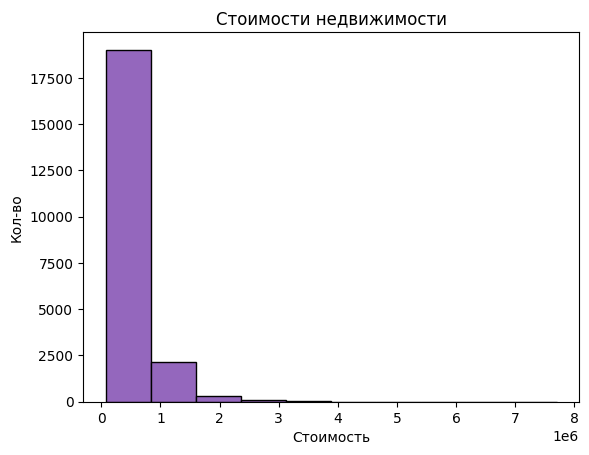

In [ ]:
plt.hist(df['price'], color='#9467bd', edgecolor='black')
plt.title('Стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во');

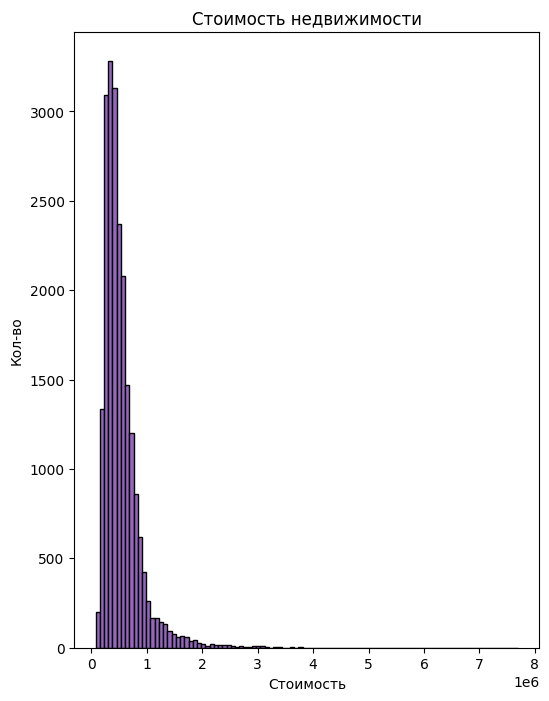

In [ ]:
plt.figure(figsize=(6,8))

plt.hist(df['price'], bins=100, color='#9467bd', edgecolor='black')
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во');

*Вывод:*

Максимальное количество недвижимости продается по цене до ~700 000-1 000 000 д.е., основная часть недвижимости продается по цене до 1 500 000 д.е.

### 1.3. Изучите распределение квадратуры жилой
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

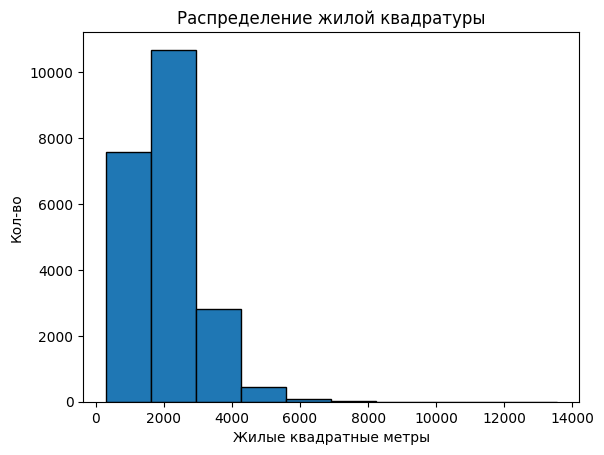

In [ ]:
plt.hist(df['sqft_living'],edgecolor='black')
plt.xlabel('Жилые квадратные метры')
plt.ylabel('Кол-во')
plt.title('Распределение жилой квадратуры');

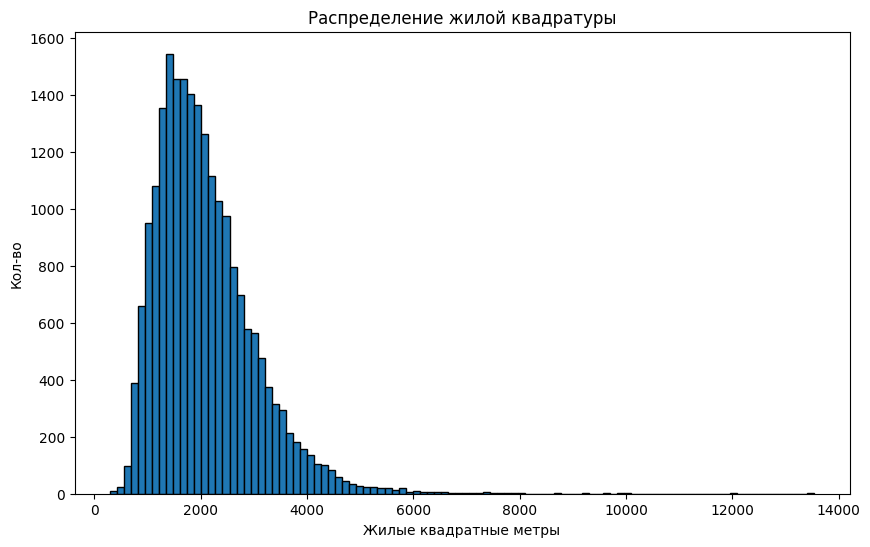

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(df['sqft_living'], bins = 100,edgecolor='black')
plt.xlabel('Жилые квадратные метры')
plt.ylabel('Кол-во')
plt.title('Распределение жилой квадратуры');

*Вывод:*

Максимальное количество недвижимости продается с жилой площадью от ~1700 до 2300 кв.м., основная часть недвижимости продается с жилой площадью от ~500 до 6000 кв.м.

### 1.4. Изучите распределение года постройки
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

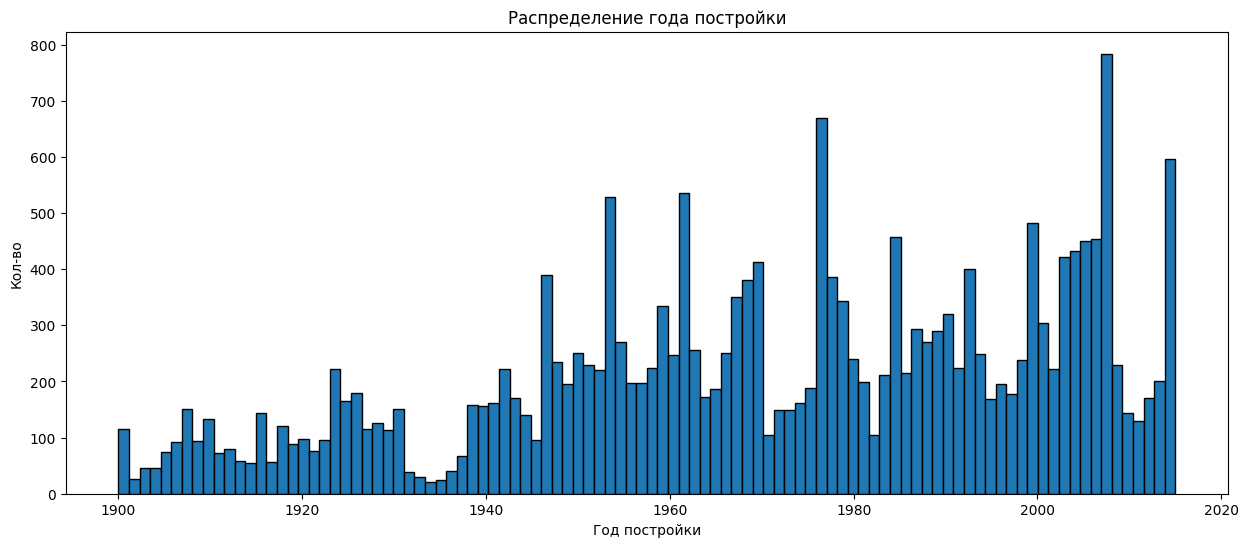

In [ ]:
plt.figure(figsize = (15,6))
plt.hist(df['yr_built'],bins = 100,edgecolor='black')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во')
plt.title('Распределение года постройки');

*Вывод:*

Кризисы строительтва были в середине 30-х и начале 70-х, пики в конце 60-х 70-х и середине 2000.

## Задание 2

### 2.1. Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

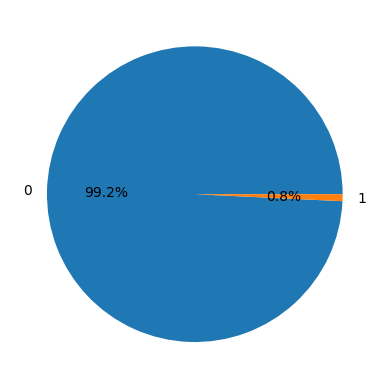

In [ ]:
data = df['waterfront'].value_counts()
data

names = data.index
values = data.values

plt.pie(values, labels=names,autopct='%.1f%%');

*Вывод:*

Всего лишь 0,8% всей недвижимости продается с видом на набережную

### 2.2. Изучите распределение этажей домов
- Постройте график
- Сделайте выводы

In [ ]:
data = df['floors'].value_counts()

names = data.index
values = data.values

data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

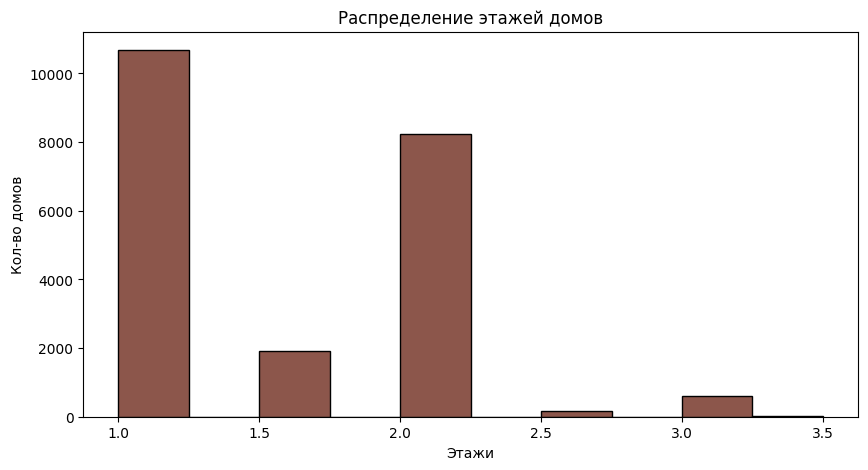

In [ ]:
plt.figure(figsize = (10,5))
plt.hist(df['floors'], color='#8c564b', edgecolor='black')
plt.xlabel('Этажи')
plt.ylabel('Кол-во домов')
plt.title('Распределение этажей домов');

*Вывод:*

1. Большая часть домов состоит из 1 и 2 этажей.
2. Одноэтажные дома лидируют по продаже недвижимости.

### 2.3. Изучите распределение состояния домов

In [ ]:
data = df['condition'].value_counts()

names = data.index
values = data.values

data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

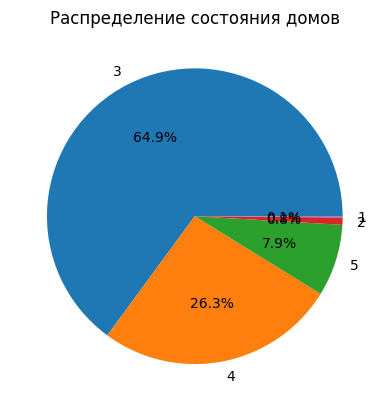

In [ ]:
plt.title("Pаспределение состояния домов")
plt.pie(values, labels=names,autopct='%.1f%%');

*Вывод:*

Менее 1% домов в плохом состоянии, около 2/3 домов в среднем (3) состоянии

## Задание 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [ ]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

<ipython-input-28-a439e4510211>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


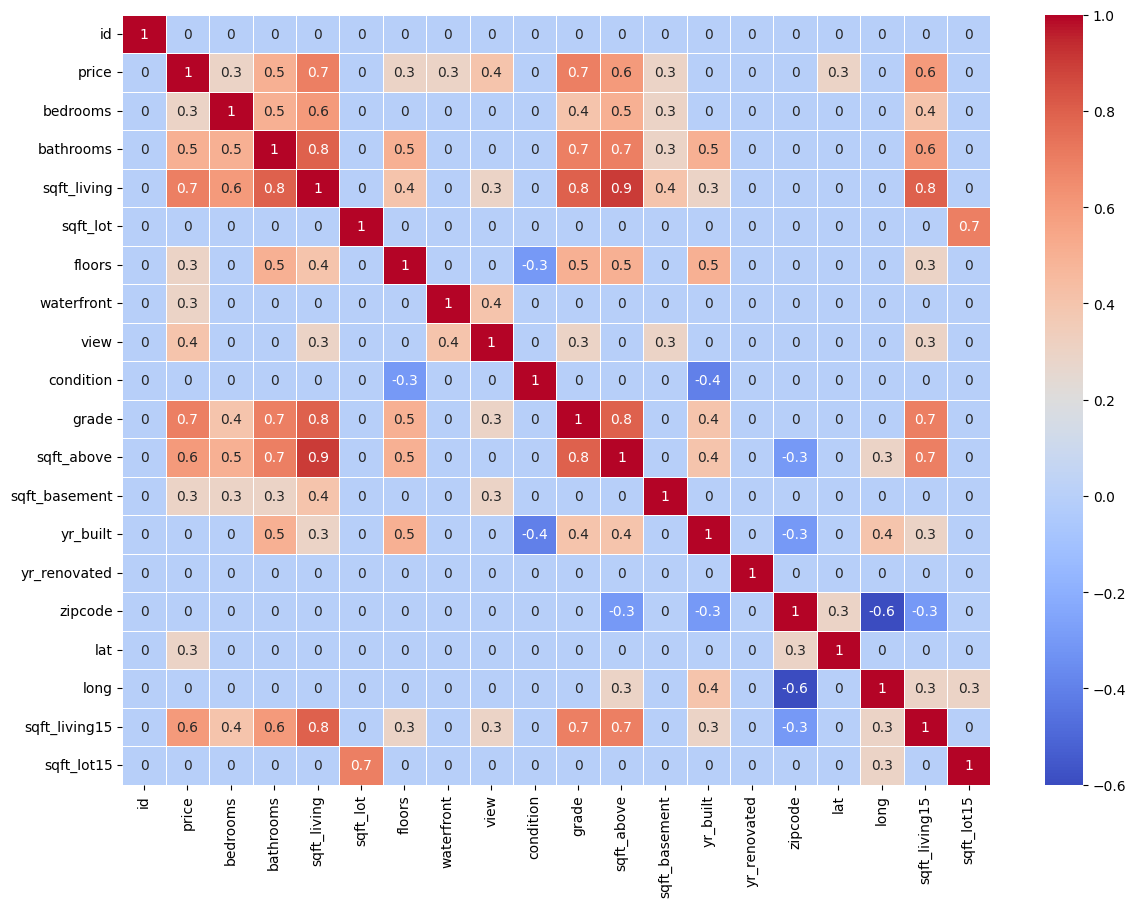

In [ ]:
plt.figure(figsize = (14,10))

sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm');

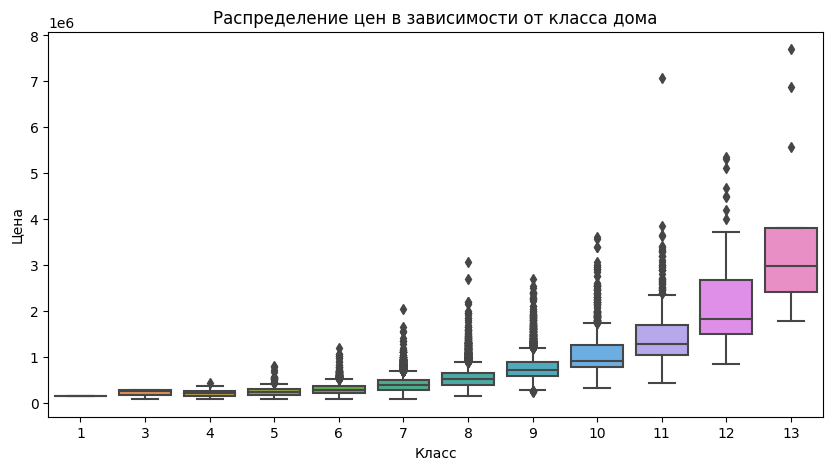

In [ ]:
plt.figure(figsize=(10, 5))

sns.boxplot(x=df['grade'], y=df['price'], whis=1.0)

plt.xlabel('Класс')
plt.ylabel('Цена')
plt.title('Распределение цен в зависимости от класса дома');

*Вывод:*

- с увеличением уровня класса (grade - качество конструкции и дизайна дома) растет разбег по цене;
- для домов с 7-11 классом наблюдается максимальное количество выбросов.

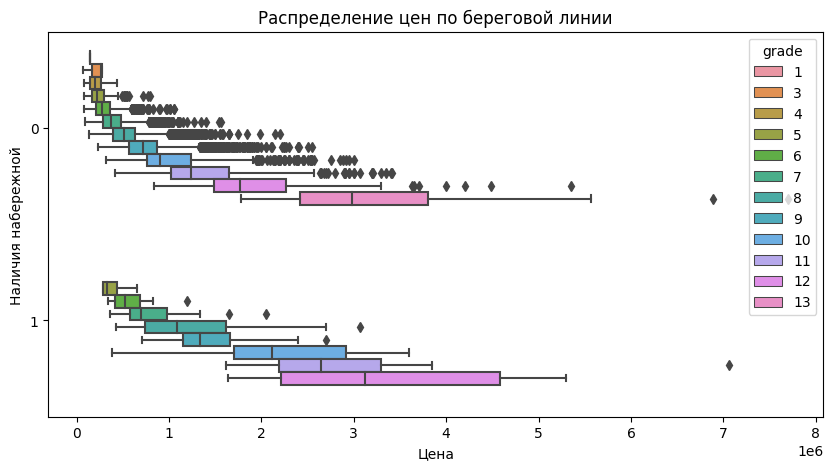

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), whis=1.5, hue=df['grade'])

plt.title('Распределение цен по береговой линии')
plt.xlabel('Цена')
plt.ylabel('Наличия набережной');

*Вывод:*

- уровень цен 50% домов, не имеющих набережную, значительно ниже, чем цена 50% домов, имеющих ее;
- для домов без набережной выбросов намного больше (видимо заинтересованность риелторов низкая по получаемой выручке и поэтому качество обработки данных теряеться);
- разбег цены для домов с набережной больше, чем для домов без нее.

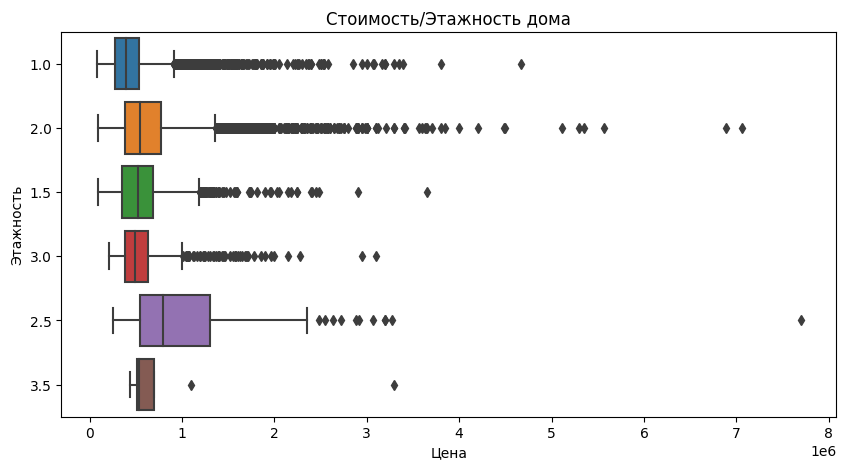

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis = 1.5)

plt.xlabel('Цена')
plt.ylabel('Этажность')
plt.title('Стоимость/Этажность дома');

*Вывод:*

- наибольший разбег по ценам наблюдается для домов в 2,5 этажей;
- минимальный разбег по ценам наблюдается для домов в 3,5 этажей;
- по 2-этажным домам наблюдается максимальное количество выбросов;
- дома с 3,5 этажами почти не имеют выбросов.